In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers

filename = 'result.csv'
df = pd.read_csv(filename)

In [ ]:
#what = 'description'
what = 'title'
#считаем уникальные слова
df['totalwords'] = df[what].str.count(' ') + 1
count = 0
np1 = []
for i in range(len(df['totalwords'])):
  words = str(df[what][i]).split(' ')
  for j in words:
    np1.append(j)
  tw = df['totalwords'][i]
uniqueWorlds = len(np.unique(np1))  
print("Уникальных слов: " + str(uniqueWorlds))

Уникальных слов: 6389


In [ ]:
#split data
train, test = train_test_split(df, test_size=0.05)
#create tokenizer for our data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=uniqueWorlds, oov_token='<UNK>')
tokenizer.fit_on_texts(train[what])

In [ ]:
def text_to_seq(data):
  seq=tokenizer.texts_to_sequences([data])
  seq=tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=300, padding="post")
  return seq

In [ ]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
uniqueWords = len(reverse_word_map)
print(uniqueWords)

5505


In [ ]:
pd.options.mode.chained_assignment = None

tempdata = []
for i in train[what]:
  tempdata.append(text_to_seq(i)[0])
train[what+'2'] = tempdata

tempdata = []
for i in test[what]:
  tempdata.append(text_to_seq(i)[0])
test[what+'2'] = tempdata

In [ ]:
x = train[what+'2'].to_numpy()
y = np.array(train['next_week']).astype("float32")
tx = test[what+'2']
ty = np.array(test['next_week']).astype("float32")

def vectorize(sequences, dimension = uniqueWords):
  results = np.zeros((len(sequences), dimension+1), dtype=bool)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

new_x = []
for i in train[what+'2']:
  new_x.append(i)
  #print(i[1])
  #break
new_x2 = np.array(vectorize(new_x), dtype='bool')
new_tx = []
for i in test[what+'2']:
  new_tx.append(i)
  #print(i[1])
  #break
new_tx2 = np.array(vectorize(new_tx), dtype='bool')


In [ ]:
uw = uniqueWords+1
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(int(uw/2), activation = "relu", input_shape=(uw,)))
# Hidden - Layers
model.add(layers.Dropout(0.22, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/4), activation = "relu"))
model.add(layers.Dropout(0.20, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/8), activation = "relu"))
model.add(layers.Dropout(0.18, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/16), activation = "relu"))
model.add(layers.Dropout(0.16, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/32), activation = "relu"))
model.add(layers.Dropout(0.14, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/64), activation = "relu"))
model.add(layers.Dropout(0.12, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/128), activation = "relu"))
model.add(layers.Dropout(0.10, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/256), activation = "relu"))
model.add(layers.Dropout(0.08, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/512), activation = "relu"))
model.add(layers.Dropout(0.06, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/1024), activation = "relu"))
model.add(layers.Dropout(0.04, noise_shape=None, seed=None))
model.add(layers.Dense(int(uw/2048), activation = "relu"))
model.add(layers.Dropout(0.02, noise_shape=None, seed=None))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
#model.summary()

# model = models.Sequential()
# # Input - Layer
# model.add(layers.Dense(int(uw/2), activation = "relu", input_shape=(uw,)))
# # Hidden - Layers
# model.add(layers.Dropout(0.35, noise_shape=None, seed=None))
# model.add(layers.Dense(int(uw/4), activation = "relu"))
# model.add(layers.Dropout(0.30, noise_shape=None, seed=None))
# model.add(layers.Dense(int(uw/8), activation = "relu"))
# model.add(layers.Dropout(0.25, noise_shape=None, seed=None))
# model.add(layers.Dense(int(uw/16), activation = "relu"))
# model.add(layers.Dropout(0.20, noise_shape=None, seed=None))
# model.add(layers.Dense(int(uw/32), activation = "relu"))
# model.add(layers.Dropout(0.15, noise_shape=None, seed=None))
# model.add(layers.Dense(int(uw/64), activation = "relu"))
# model.add(layers.Dropout(0.10, noise_shape=None, seed=None))
# model.add(layers.Dense(int(uw/128), activation = "relu"))
# model.add(layers.Dropout(0.05, noise_shape=None, seed=None))
# # Output- Layer
# model.add(layers.Dense(1, activation = "sigmoid"))
# #model.summary()

#BEST SOLUTION
  #model.add(layers.Dense(int(uw/2), activation = "relu", input_shape=(uw,)))
  # Hidden - Layers
  #model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
  #model.add(layers.Dense(int(uw/8), activation = "relu"))
  #model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
  #model.add(layers.Dense(int(uw/16), activation = "relu"))
  #model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
  #model.add(layers.Dense(50, activation = "relu"))
  # Output- Layer
  #model.add(layers.Dense(1, activation = "sigmoid"))
  #model.summary()


model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=90
)

In [ ]:
history = model.fit(new_x2, y,
        epochs= 10,
        validation_data = (new_tx2, ty)
        )

Epoch 1/10
79/79 [==============================] - 11s 139ms/step - loss: 0.6935 - accuracy: 0.5086 - val_loss: 0.6936 - val_accuracy: 0.4848
Epoch 2/10
79/79 [==============================] - 11s 137ms/step - loss: 0.6700 - accuracy: 0.5800 - val_loss: 0.7111 - val_accuracy: 0.4924
Epoch 3/10
79/79 [==============================] - 11s 137ms/step - loss: 0.5279 - accuracy: 0.7818 - val_loss: 0.8470 - val_accuracy: 0.5227
Epoch 4/10
79/79 [==============================] - 11s 137ms/step - loss: 0.4456 - accuracy: 0.8500 - val_loss: 1.0205 - val_accuracy: 0.5000
Epoch 5/10
79/79 [==============================] - 11s 136ms/step - loss: 0.3935 - accuracy: 0.8692 - val_loss: 1.0010 - val_accuracy: 0.4924
Epoch 6/10
79/79 [==============================] - 11s 136ms/step - loss: 0.3713 - accuracy: 0.8811 - val_loss: 1.2728 - val_accuracy: 0.5076
Epoch 7/10
79/79 [==============================] - 11s 137ms/step - loss: 0.3539 - accuracy: 0.8919 - val_loss: 1.7311 - val_accuracy: 0.5227

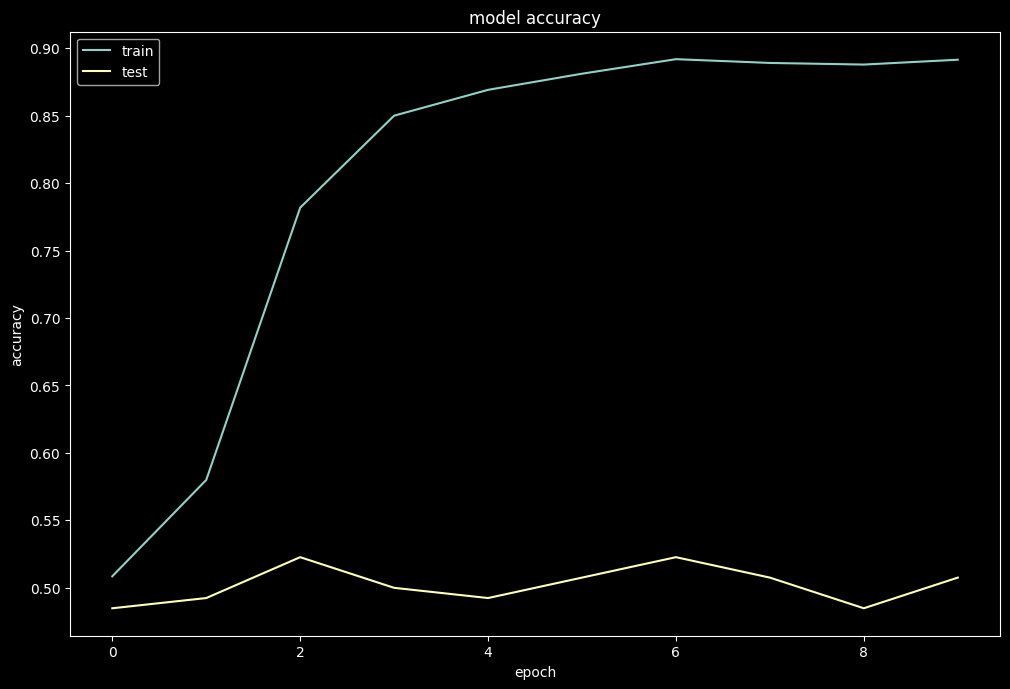

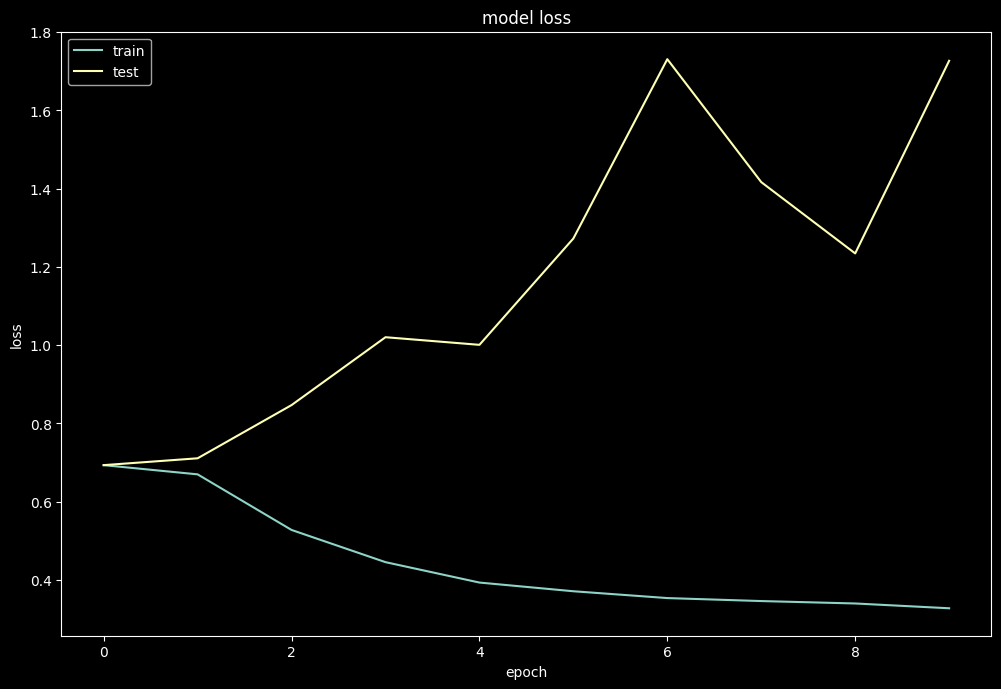

In [ ]:
plt.style.use(['dark_background'])
#plt.suptitle('figure title', color='w')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(new_tx2, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

5/5 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00
loss: 0.000
accuracy: 0.000
